In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + 2 + np.random.randn(m,1)

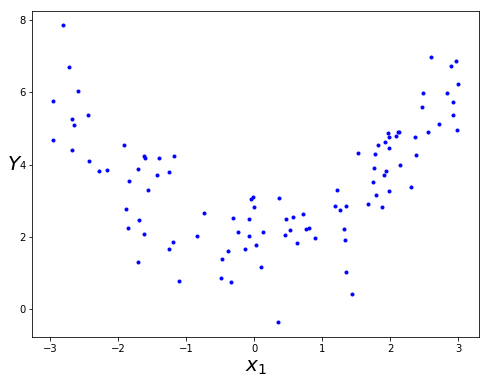

In [4]:
plt.figure(figsize=(8,6))
plt.plot(X,y, 'b.')
plt.ylabel(r'$Y$', rotation=0,fontsize= 20)
plt.xlabel(r'$x_1$',fontsize= 20)
plt.show()

In [5]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
lin_reg.intercept_, lin_reg.coef_

(array([ 1.90921586]), array([[ 0.03801994,  0.49314575]]))

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.figure(figsize=(8,6))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label = 'Training Set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label = 'Validation Set')
    plt.xlabel('Training Test Size', fontsize = 20)
    plt.ylabel('RMSE', fontsize = 20)
    plt.ylim([0, 3])
    plt.legend()

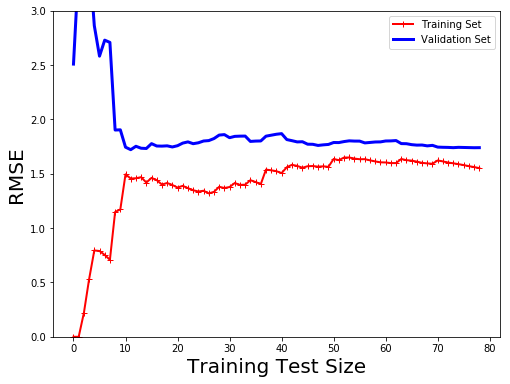

In [52]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

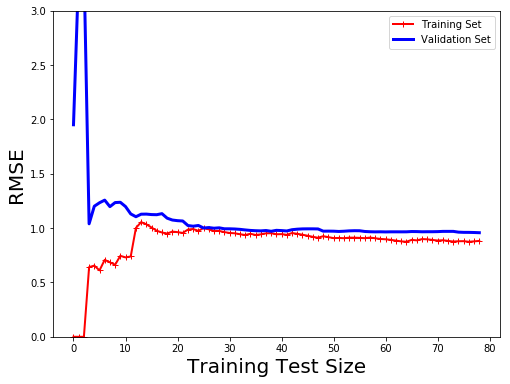

In [53]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

In [78]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import SGDRegressor

ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[ 3.68643477]])

In [75]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([ 3.01212697])

In [77]:
ridge_reg = Lasso(alpha = 0.1)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([ 3.6490985])

In [79]:
elastic_net = ElasticNet(alpha = 0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([ 3.66579606])